In [1]:
import matplotlib.pyplot as plt
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [ ]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [2]:
# width,height,channels
image_shape = (224,224,3)
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#Data preparation - image (normalisng)
#using datagenerator Api
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               rescale=1/255, # Rescale the image by normalzing it.
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

# Creating the Model - CNN


In [4]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [5]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())


model.add(Dense(256))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer only one dense, remember its binary, 0=Benign , 1=Malignant
model.add(Dense(1))
model.add(Activation('sigmoid'))

#loss fn  -  binar_crossentropy bcs 0 or 1 prediction 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0

### Training the Model

In [7]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('C:/Users/amart/Desktop/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 2637 images belonging to 2 classes.


In [8]:
test_image_gen = image_gen.flow_from_directory('C:/Users/amart/Desktop/test',
                                                 target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 660 images belonging to 2 classes.


In [49]:
train_image_gen.class_indices

{'benign': 0, 'malignant': 1}

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
#the number of samples processed for each epoch is batch_size * steps_per_epochs
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=25,
                              validation_data=test_image_gen,
                             validation_steps=12
                             )

Epoch 1/100
25/25 [==============================] - 55s 2s/step - loss: 0.7028 - accuracy: 0.4583 - val_loss: 0.6699 - val_accuracy: 0.5833
Epoch 2/100
25/25 [==============================] - 41s 2s/step - loss: 0.6293 - accuracy: 0.5635 - val_loss: 0.5716 - val_accuracy: 0.6979
Epoch 3/100
25/25 [==============================] - 44s 2s/step - loss: 0.5874 - accuracy: 0.7275 - val_loss: 0.5025 - val_accuracy: 0.7760
Epoch 4/100
25/25 [==============================] - 43s 2s/step - loss: 0.4994 - accuracy: 0.7722 - val_loss: 0.5818 - val_accuracy: 0.7292
Epoch 5/100
25/25 [==============================] - 47s 2s/step - loss: 0.5500 - accuracy: 0.6823 - val_loss: 0.6113 - val_accuracy: 0.6667
Epoch 6/100
25/25 [==============================] - 45s 2s/step - loss: 0.5548 - accuracy: 0.7571 - val_loss: 0.5612 - val_accuracy: 0.7396
Epoch 7/100
25/25 [==============================] - 45s 2s/step - loss: 0.5038 - accuracy: 0.7591 - val_loss: 0.4924 - val_accuracy: 0.7656
Epoch 8/100
2

In [13]:
import numpy as np
print(np.mean(results.history['accuracy']))
print(np.mean(results.history['val_accuracy']))
print(np.mean(results.history['loss']))
print(np.mean(results.history['val_loss']))


0.7808384788036347
0.7699479168653488
0.44032738864421844
0.4552198901772499


# Evaluating the Model

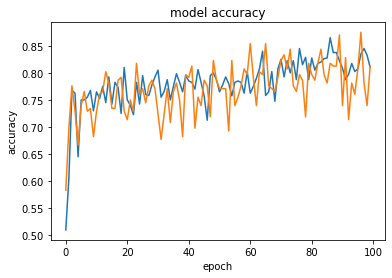

In [14]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

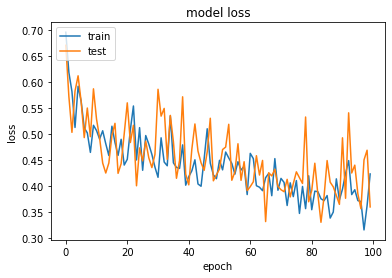

In [15]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Predicting on new images

In [47]:
train_image_gen.class_indices

{'benign': 0, 'malignant': 1}

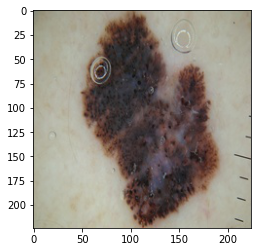

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

benign_file = 'C:/Users/amart/Desktop/test/malignant/3.jpg'

benign_img = image.load_img(benign_file)
plt.imshow(benign_img)
benign_img = image.img_to_array(benign_img)
benign_img = benign_img/255
benign_img = benign_img.reshape(1,224,224,3)


In [57]:
prediction_prob = model.predict(benign_img)

In [58]:
model.save("model.h5")

In [59]:
# Output prediction
print(f'Probability that image is a malignant is: {prediction_prob} ')

Probability that image is a malignant is: [[0.8611857]] 
